# Assignment 4
### Madi Hamilton
## Further Exploration of Zero Vehicle Households and Food Access Data
### Displaying A Selection of Specially Symbolized Census Tracts in LA City and Creating Neater Graphs

### Importing Libraries

In [80]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

### Importing and Describing Census Data

Before importing the data here, I created the FIPS column from the GEO_ID column and replaced any dashes with zeros.

In [81]:
econ20 = pd.read_csv('Data/ACSDP5Y2020.DP03-Data.csv', dtype= {'FIPS':str})
econ20.head()

/tmp/ipykernel_4525/790885179.py:1: DtypeWarning: Columns (51,52,125,127,131,177,178,181,185,186,187,189,280,282,284,286,288,290,294,298,300,302,314,316,318,320,322,324,330,332,334,336,338,342,344,346,348,350,352,354,356,358,360,362,364,366,370,372,374,376,380,382,384,386,388,390,392,394,396,398,404,408,412,416,420,424,428,430,432,434,436,438,440,442,444,446,468,470,472,474,478,486,488,490,492,506,508,510,512,514,520,532,542,544,548) have mixed types. Specify dtype option on import or set low_memory=False.
  econ20 = pd.read_csv('Data/ACSDP5Y2020.DP03-Data.csv', dtype= {'FIPS':str})


,GEO_ID,FIPS,NAME,DP03_0001E,DP03_0001M,DP03_0002E,DP03_0002M,DP03_0003E,DP03_0003M,DP03_0004E,...,DP03_0133PE,DP03_0133PM,DP03_0134PE,DP03_0134PM,DP03_0135PE,DP03_0135PM,DP03_0136PE,DP03_0136PM,DP03_0137PE,DP03_0137PM
0,1400000U,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",3356,353,2099,269,2099,269,1989,...,11.8,6.7,10.5,6.4,16.6,9.9,8.1,7,30.1,10.4
1,1400000U,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",3548,832,2287,528,2287,528,2077,...,3.5,2.1,4.1,2.7,1.7,2.9,3.0,3.3,16.7,11.9
2,1400000U,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3123,392,2017,382,2017,382,1792,...,14.4,5,14.6,5.6,13.4,9.8,13.8,7.8,31.0,13.1
3,1400000U,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",3216,634,1744,332,1744,332,1631,...,20.2,11.5,22.6,12.4,9.3,18.2,14.4,11.6,42.0,20.9
4,1400000U,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",2197,425,1402,325,1402,325,1249,...,30.6,11,26.2,9.2,49.8,30.2,34.9,14.4,50.8,24.5


In [82]:
hous20 = pd.read_csv('Data/ACSDP5Y2020.DP04-Data.csv', dtype= {'FIPS':str})
hous20.head()

/tmp/ipykernel_4525/3234919032.py:1: DtypeWarning: Columns (12,75,100,292,294,302,304,306,308,310,312,314,316,318,322,324,326,328,330,332,334,336,338,340,344,346,348,350,352,354,356,358,360,366,368,370,372,374,376,380,382,390,392,394,396,398,400,404,406,408,410,414,416,418,420,422,424,426,428,430,434,436,438,442,444,446,542,544,546,548,550,552,554,562,564,566,568,570,572) have mixed types. Specify dtype option on import or set low_memory=False.
  hous20 = pd.read_csv('Data/ACSDP5Y2020.DP04-Data.csv', dtype= {'FIPS':str})


,GEO_ID,FIPS,NAME,DP04_0001E,DP04_0001M,DP04_0002E,DP04_0002M,DP04_0003E,DP04_0003M,DP04_0004E,...,DP04_0139PE,DP04_0139PM,DP04_0140PE,DP04_0140PM,DP04_0141PE,DP04_0141PM,DP04_0142PE,DP04_0142PM,DP04_0143PE,DP04_0143PM
0,1400000U,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1629,93,1505,112,124,77,0.0,...,19.7,12.4,5.7,5.1,9.9,8,44.9,14.4,(X),(X)
1,1400000U,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",1406,144,1341,151,65,64,0.0,...,19.3,23.4,0.0,15.1,21.3,25.2,59.4,27.4,(X),(X)
2,1400000U,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1462,208,1430,208,32,31,0.0,...,7.3,4.5,19.5,14,11.9,7.9,47.5,12.3,(X),(X)
3,1400000U,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",1567,322,1513,325,54,59,0.0,...,5.8,5.3,11.4,8.7,8.5,5.9,65.6,14.9,(X),(X)
4,1400000U,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",986,173,969,174,17,26,0.0,...,1.1,2,4.6,7.3,0.0,4.9,74.4,14.3,(X),(X)


#### Merging the two census datasets with economic and household characteristic variables

In [83]:
census20 = econ20.merge(hous20,on="FIPS")
census20.head()

,GEO_ID_x,FIPS,NAME_x,DP03_0001E,DP03_0001M,DP03_0002E,DP03_0002M,DP03_0003E,DP03_0003M,DP03_0004E,...,DP04_0139PE,DP04_0139PM,DP04_0140PE,DP04_0140PM,DP04_0141PE,DP04_0141PM,DP04_0142PE,DP04_0142PM,DP04_0143PE,DP04_0143PM
0,1400000U,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",3356,353,2099,269,2099,269,1989,...,19.7,12.4,5.7,5.1,9.9,8,44.9,14.4,(X),(X)
1,1400000U,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",3548,832,2287,528,2287,528,2077,...,19.3,23.4,0.0,15.1,21.3,25.2,59.4,27.4,(X),(X)
2,1400000U,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3123,392,2017,382,2017,382,1792,...,7.3,4.5,19.5,14,11.9,7.9,47.5,12.3,(X),(X)
3,1400000U,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",3216,634,1744,332,1744,332,1631,...,5.8,5.3,11.4,8.7,8.5,5.9,65.6,14.9,(X),(X)
4,1400000U,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",2197,425,1402,325,1402,325,1249,...,1.1,2,4.6,7.3,0.0,4.9,74.4,14.3,(X),(X)


In [84]:
census20.shape

(2498, 1125)

In [85]:
census20.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 1125 columns):
 #     Column       Non-Null Count  Dtype  
---    ------       --------------  -----  
 0     GEO_ID_x     2498 non-null   object 
 1     FIPS         2498 non-null   object 
 2     NAME_x       2498 non-null   object 
 3     DP03_0001E   2498 non-null   int64  
 4     DP03_0001M   2498 non-null   int64  
 5     DP03_0002E   2498 non-null   int64  
 6     DP03_0002M   2498 non-null   int64  
 7     DP03_0003E   2498 non-null   int64  
 8     DP03_0003M   2498 non-null   int64  
 9     DP03_0004E   2498 non-null   int64  
 10    DP03_0004M   2498 non-null   int64  
 11    DP03_0005E   2498 non-null   int64  
 12    DP03_0005M   2498 non-null   int64  
 13    DP03_0006E   2498 non-null   int64  
 14    DP03_0006M   2498 non-null   int64  
 15    DP03_0007E   2498 non-null   int64  
 16    DP03_0007M   2498 non-null   int64  
 17    DP03_0008E   2498 non-null   int64  
 18    DP03

### Keeping Certain Columns and Renaming Them

In [86]:
columns_to_keep= [
'FIPS',
'NAME_x',
'DP03_0051E',
'DP03_0052E',
'DP03_0053E',
'DP03_0054E',
'DP03_0055E',
'DP03_0056E',
'DP03_0057E',
'DP03_0058E',
'DP03_0059E',
'DP03_0060E',
'DP03_0061E',
'DP03_0096PE',
'DP03_0097PE',
'DP03_0098PE',
'DP03_0099PE',
'DP04_0058PE',
'DP04_0059PE',
'DP04_0060PE',
'DP04_0061PE']

#add to new dataframe
new_census20=census20[columns_to_keep]
new_census20

,FIPS,NAME_x,DP03_0051E,DP03_0052E,DP03_0053E,DP03_0054E,DP03_0055E,DP03_0056E,DP03_0057E,DP03_0058E,...,DP03_0060E,DP03_0061E,DP03_0096PE,DP03_0097PE,DP03_0098PE,DP03_0099PE,DP04_0058PE,DP04_0059PE,DP04_0060PE,DP04_0061PE
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1505,84,91,87,97,234,161,242,...,138,65,90.7,62.4,37.0,9.3,7.4,30.3,41.7,20.6
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",1341,67,8,39,61,35,275,220,...,133,213,94.9,70.7,33.9,5.1,0.6,25.9,39.7,33.8
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1430,99,93,168,92,201,213,152,...,166,73,89.5,58.2,37.5,10.5,8.0,26.7,48.6,16.6
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",1513,110,95,309,114,228,206,160,...,107,0,91.2,47.1,53.6,8.8,17.5,37.1,33.8,11.6
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",969,177,156,93,157,121,116,48,...,0,28,86.0,37.1,51.0,14.0,20.2,25.8,43.3,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,06037980038,"Census Tract 9800.38, Los Angeles County, Cali...",0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2494,06037980039,"Census Tract 9800.39, Los Angeles County, Cali...",0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2495,06037990100,"Census Tract 9901, Los Angeles County, California",0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,06037990200,"Census Tract 9902, Los Angeles County, California",0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
new_census20.columns = [
'FIPS',
'Name',
'Total Population',
'<10k',
'10k to 14.9k',
'15k to 24.9k',
'25k to 34.9k',
'35k to 49.9k',
'50k to 74.9k',
'75k to 99.9k',
'100k to 149.9k',
'150k to 199.9k',
'>200k',
'% Health Insured',
'% Private Insured',
'% Public Insured',
'% Not Insured',
'No Vehicles',
'1 Vehicle',
'2 Vehicles',
'3 or More Vehicles']

new_census20.head(5)

,FIPS,Name,Total Population,<10k,10k to 14.9k,15k to 24.9k,25k to 34.9k,35k to 49.9k,50k to 74.9k,75k to 99.9k,...,150k to 199.9k,>200k,% Health Insured,% Private Insured,% Public Insured,% Not Insured,No Vehicles,1 Vehicle,2 Vehicles,3 or More Vehicles
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1505,84,91,87,97,234,161,242,...,138,65,90.7,62.4,37.0,9.3,7.4,30.3,41.7,20.6
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",1341,67,8,39,61,35,275,220,...,133,213,94.9,70.7,33.9,5.1,0.6,25.9,39.7,33.8
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1430,99,93,168,92,201,213,152,...,166,73,89.5,58.2,37.5,10.5,8.0,26.7,48.6,16.6
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",1513,110,95,309,114,228,206,160,...,107,0,91.2,47.1,53.6,8.8,17.5,37.1,33.8,11.6
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",969,177,156,93,157,121,116,48,...,0,28,86.0,37.1,51.0,14.0,20.2,25.8,43.3,10.6


### Graphing Census Data

In [88]:
new_census20['No Vehicles'].describe()

count    2498.000000
mean        8.850560
std         9.185748
min         0.000000
25%         2.800000
50%         6.200000
75%        11.900000
max        86.400000
Name: No Vehicles, dtype: float64

In [89]:
new_census20.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FIPS                2498 non-null   object 
 1   Name                2498 non-null   object 
 2   Total Population    2498 non-null   int64  
 3   <10k                2498 non-null   int64  
 4   10k to 14.9k        2498 non-null   int64  
 5   15k to 24.9k        2498 non-null   int64  
 6   25k to 34.9k        2498 non-null   int64  
 7   35k to 49.9k        2498 non-null   int64  
 8   50k to 74.9k        2498 non-null   int64  
 9   75k to 99.9k        2498 non-null   int64  
 10  100k to 149.9k      2498 non-null   int64  
 11  150k to 199.9k      2498 non-null   int64  
 12  >200k               2498 non-null   int64  
 13  % Health Insured    2498 non-null   float64
 14  % Private Insured   2498 non-null   float64
 15  % Public Insured    2498 non-null   float64
 16  % Not 

In [90]:
new_census20['No Vehicles'].sample(10)

2038    15.8
1879     6.0
2087    15.8
192     16.0
416      6.1
1093     4.8
2303     0.0
2287     4.8
573     12.7
2316    13.9
Name: No Vehicles, dtype: float64

In [91]:
new_census20.to_csv('census.csv')

In [92]:
new_census20.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FIPS                2498 non-null   object 
 1   Name                2498 non-null   object 
 2   Total Population    2498 non-null   int64  
 3   <10k                2498 non-null   int64  
 4   10k to 14.9k        2498 non-null   int64  
 5   15k to 24.9k        2498 non-null   int64  
 6   25k to 34.9k        2498 non-null   int64  
 7   35k to 49.9k        2498 non-null   int64  
 8   50k to 74.9k        2498 non-null   int64  
 9   75k to 99.9k        2498 non-null   int64  
 10  100k to 149.9k      2498 non-null   int64  
 11  150k to 199.9k      2498 non-null   int64  
 12  >200k               2498 non-null   int64  
 13  % Health Insured    2498 non-null   float64
 14  % Private Insured   2498 non-null   float64
 15  % Public Insured    2498 non-null   float64
 16  % Not 

#### Histogram for Zero Vehicle Households by Census Tract

<Axes: ylabel='Frequency'>

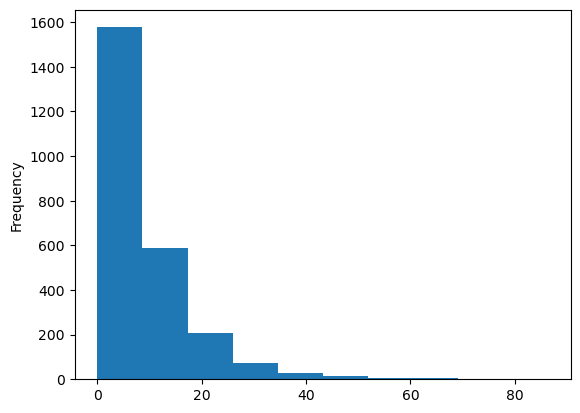

In [93]:
new_census20['No Vehicles'].plot.hist()

#### Box Plot for Zero Vehicle Households by Census Tract

<Axes: >

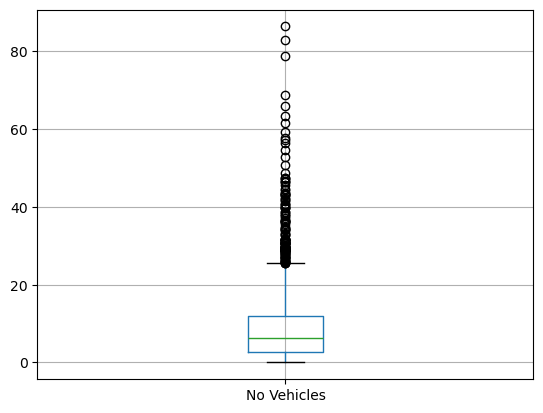

In [95]:
new_census20.boxplot(column=['No Vehicles'])

#### Bar Chart based on the Top 10 Census Tracts by Proportion of Zero Vehicle Households

In [96]:
census_sorted = new_census20.sort_values(by='No Vehicles',ascending=False)

In [97]:
census_sorted[['FIPS','No Vehicles']].head(10)

,FIPS,No Vehicles
588,06037206301,86.4
589,06037206302,82.8
590,06037206303,78.9
598,06037207307,68.7
595,06037207304,66.0
587,06037206202,63.3
632,06037209402,61.5
626,06037209105,59.3
602,06037207502,57.7
770,06037224701,57.2


<Axes: title={'center': 'Top 10 Census Tracts with the Highest Proportion of Zero Vehicle Households in 2020'}, ylabel='FIPS'>

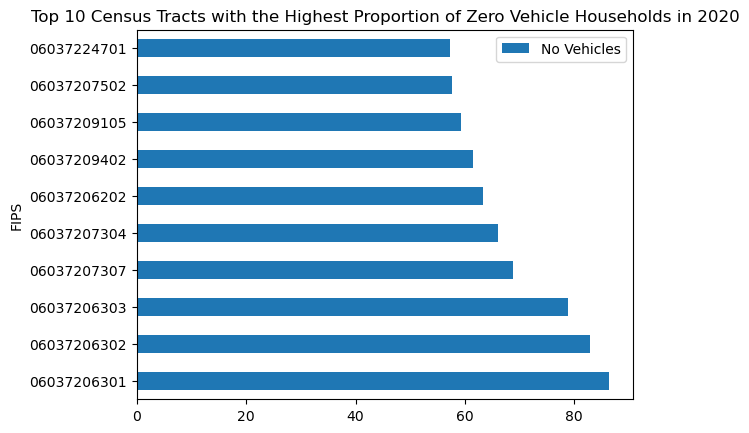

In [98]:
census_sorted.head(10).plot.barh(x='FIPS',y='No Vehicles',
                               title='Top 10 Census Tracts with the Highest Proportion of Zero Vehicle Households in 2020')

### Merging Census Data with Census Tract Shapefile

#### Importing Census Tract Shapefile and Constraining to LA County

In [99]:
tracts = gpd.read_file('Data/tl_2020_06_tract.shp')
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,029,004402,06029004402,44.02,Census Tract 44.02,G5020,S,1865739,0,+35.5917343,-119.3337642,"POLYGON ((-119.33828 35.58143, -119.33827 35.5..."
1,06,047,000802,06047000802,8.02,Census Tract 8.02,G5020,S,2321653,0,+37.3433591,-120.5854604,"POLYGON ((-120.59599 37.34121, -120.59596 37.3..."
2,06,085,501402,06085501402,5014.02,Census Tract 5014.02,G5020,S,522620,0,+37.3453341,-121.8665169,"POLYGON ((-121.87381 37.34412, -121.87361 37.3..."
3,06,005,000102,06005000102,1.02,Census Tract 1.02,G5020,S,456204155,7940832,+38.5496993,-120.2509786,"POLYGON ((-120.61016 38.41560, -120.61000 38.4..."
4,06,029,004901,06029004901,49.01,Census Tract 49.01,G5020,S,1459379,0,+35.7837173,-119.2462266,"POLYGON ((-119.25262 35.79043, -119.25259 35.7..."


<Axes: >

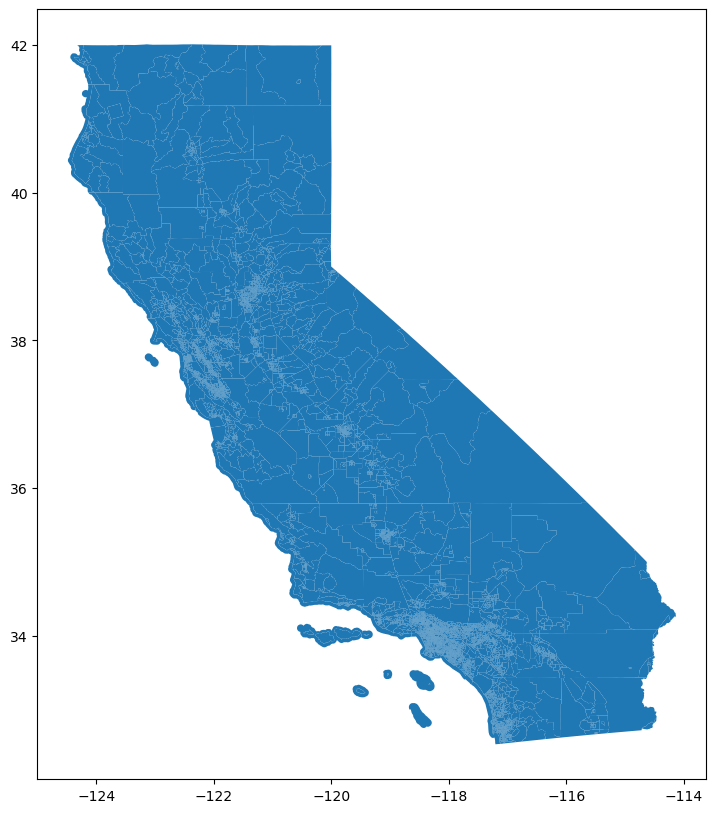

In [100]:
tracts.plot(figsize=(12,10))

In [101]:
tracts['COUNTYFP'].unique()

array(['029', '047', '085', '005', '019', '073', '037', '071', '033',
       '053', '083', '111', '013', '035', '039', '065', '095', '103',
       '057', '001', '113', '025', '043', '115', '109', '101', '041',
       '009', '099', '079', '017', '027', '075', '023', '045', '087',
       '061', '097', '081', '059', '089', '077', '105', '093', '055',
       '067', '007', '011', '049', '069', '015', '107', '021', '063',
       '031', '051', '003', '091'], dtype=object)

In [102]:
tracts.info(verbose=True,show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   9129 non-null   object  
 1   COUNTYFP  9129 non-null   object  
 2   TRACTCE   9129 non-null   object  
 3   GEOID     9129 non-null   object  
 4   NAME      9129 non-null   object  
 5   NAMELSAD  9129 non-null   object  
 6   MTFCC     9129 non-null   object  
 7   FUNCSTAT  9129 non-null   object  
 8   ALAND     9129 non-null   int64   
 9   AWATER    9129 non-null   int64   
 10  INTPTLAT  9129 non-null   object  
 11  INTPTLON  9129 non-null   object  
 12  geometry  9129 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 927.3+ KB


In [103]:
latracts = tracts.query("COUNTYFP == '037'")

<Axes: >

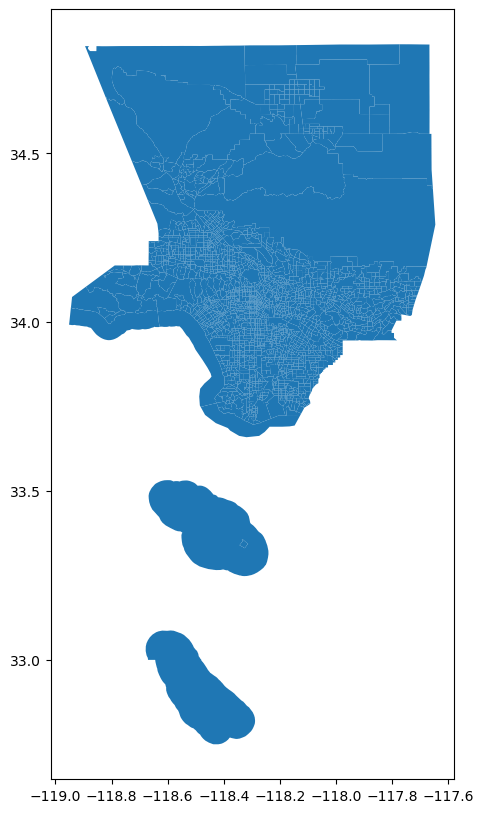

In [104]:
latracts.plot(figsize=(12,10))

In [105]:
latracts['FIPS'] = '06' + '037' + latracts['TRACTCE']
latracts.head()

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS
17,06,037,262601,06037262601,2626.01,Census Tract 2626.01,G5020,S,3620351,0,+34.0738344,-118.5557893,"POLYGON ((-118.57556 34.08019, -118.57497 34.0...",06037262601
62,06,037,300100,06037300100,3001,Census Tract 3001,G5020,S,4591342,18657,+34.2442558,-118.2325716,"POLYGON ((-118.24859 34.23881, -118.24858 34.2...",06037300100
65,06,037,300501,06037300501,3005.01,Census Tract 3005.01,G5020,S,1260255,0,+34.2206887,-118.2400494,"POLYGON ((-118.24875 34.22249, -118.24875 34.2...",06037300501
78,06,037,310701,06037310701,3107.01,Census Tract 3107.01,G5020,S,515339,0,+34.1853923,-118.3128440,"POLYGON ((-118.31952 34.18495, -118.31915 34.1...",06037310701
211,06,037,300200,06037300200,3002,Census Tract 3002,G5020,S,1943986,10136,+34.2283768,-118.2386852,"POLYGON ((-118.24864 34.23324, -118.24863 34.2...",06037300200


In [106]:
tracts_census= latracts.merge(new_census20,on="FIPS")

In [107]:
tracts_census.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,150k to 199.9k,>200k,% Health Insured,% Private Insured,% Public Insured,% Not Insured,No Vehicles,1 Vehicle,2 Vehicles,3 or More Vehicles
0,06,037,262601,06037262601,2626.01,Census Tract 2626.01,G5020,S,3620351,0,...,187,652,99.9,88.7,23.1,0.1,0.5,19.1,49.2,31.2
1,06,037,300100,06037300100,3001,Census Tract 3001,G5020,S,4591342,18657,...,374,492,99.5,90.9,26.9,0.5,4.7,17.2,39.1,39.0
2,06,037,300501,06037300501,3005.01,Census Tract 3005.01,G5020,S,1260255,0,...,93,159,98.1,81.3,22.8,1.9,4.1,28.3,31.3,36.3
3,06,037,310701,06037310701,3107.01,Census Tract 3107.01,G5020,S,515339,0,...,80,52,97.9,52.1,55.7,2.1,25.7,46.0,21.3,7.0
4,06,037,300200,06037300200,3002,Census Tract 3002,G5020,S,1943986,10136,...,154,524,96.5,85.1,23.5,3.5,4.5,21.3,41.8,32.5


In [108]:
tracts_census.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   STATEFP             2498 non-null   object  
 1   COUNTYFP            2498 non-null   object  
 2   TRACTCE             2498 non-null   object  
 3   GEOID               2498 non-null   object  
 4   NAME                2498 non-null   object  
 5   NAMELSAD            2498 non-null   object  
 6   MTFCC               2498 non-null   object  
 7   FUNCSTAT            2498 non-null   object  
 8   ALAND               2498 non-null   int64   
 9   AWATER              2498 non-null   int64   
 10  INTPTLAT            2498 non-null   object  
 11  INTPTLON            2498 non-null   object  
 12  geometry            2498 non-null   geometry
 13  FIPS                2498 non-null   object  
 14  Name                2498 non-null   object  
 15  Total Population    2498 non-n

### Mapping Census Data

<Axes: >

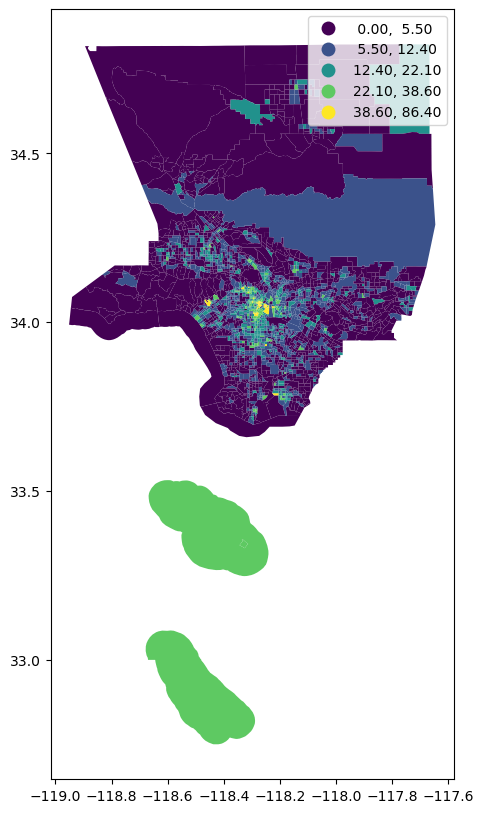

In [109]:
tracts_census.plot(figsize=(12,10),
                   column='No Vehicles',
                   legend=True,
                   scheme='NaturalBreaks')

#### Creating Maps with Only Certain Census Tracts

In [110]:
tracts_census_sort = tracts_census.sort_values(by='No Vehicles',ascending=False)

In [111]:
tracts_census_sort.loc[(tracts_census_sort['No Vehicles']<57),['No Vehicles']]=np.nan

In [112]:
tracts_census_sort.sample(5)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,150k to 199.9k,>200k,% Health Insured,% Private Insured,% Public Insured,% Not Insured,No Vehicles,1 Vehicle,2 Vehicles,3 or More Vehicles
2011,06,037,980025,06037980025,9800.25,Census Tract 9800.25,G5020,S,3846976,47642,...,0,12,93.2,67.4,28.8,6.8,NaN,60.5,39.5,0.0
1927,06,037,132700,06037132700,1327,Census Tract 1327,G5020,S,1310875,10477,...,98,188,92.8,57.6,42.0,7.2,NaN,28.3,43.8,20.9
1063,06,037,461100,06037461100,4611,Census Tract 4611,G5020,S,1949762,8976,...,161,213,93.6,63.1,41.0,6.4,NaN,34.4,43.6,18.3
800,06,037,407902,06037407902,4079.02,Census Tract 4079.02,G5020,S,470452,304,...,52,25,93.6,69.3,30.2,6.4,NaN,18.0,22.2,52.9
869,06,037,670101,06037670101,6701.01,Census Tract 6701.01,G5020,S,1101060,0,...,170,169,97.4,56.9,51.4,2.6,NaN,28.7,40.3,19.3


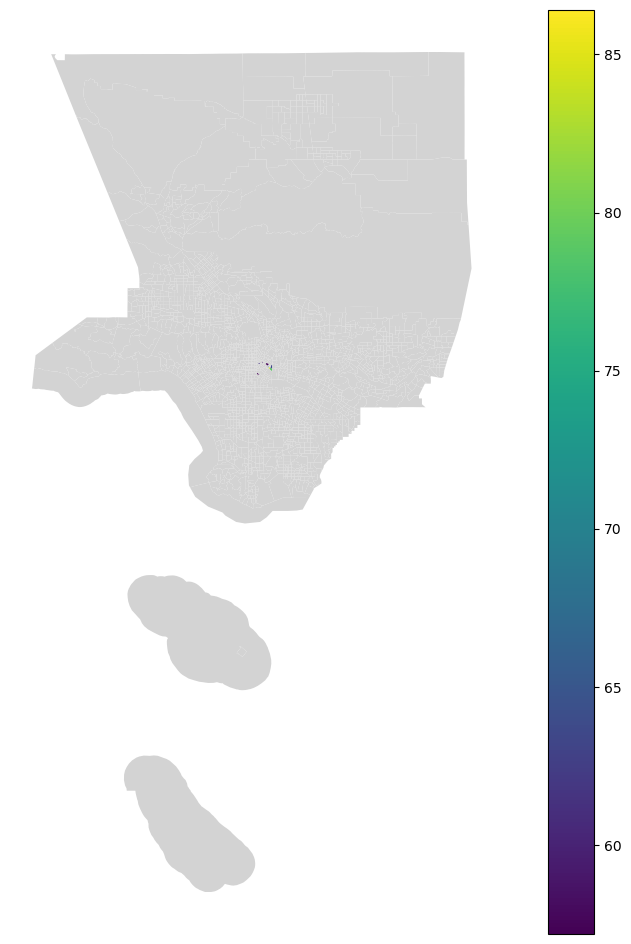

In [113]:
ax = tracts_census_sort.plot(column='No Vehicles',legend=True,figsize=(14,12), missing_kwds={'color':'lightgrey'})
ax.set_axis_off()

Because the top 10 census tracts are geographically small, they don't show up very well on the map. I might cut out the census tracts for the islands so the scale and census tracts can be bigger. Setting the axis off and increasing the size of the map help slightly but not enough.

## Exploring EBT Access Data

### Importing EBT Access Data

In [114]:
import matplotlib.pyplot as plt

In [115]:
snap21 = pd.read_csv('Data/SNAP Acceptance Count - 2021.csv',dtype= {'FIPS':str})
snap21.head()

,geoid,FIPS,geoid20,year,total_pop,snap_accepting_count,snap_rate
0,1400000U,06037101110,101110,2021,3879,0,0.0
1,1400000U,06037102103,102103,2021,1767,0,0.0
2,1400000U,06037102104,102104,2021,4003,0,0.0
3,1400000U,06037102105,102105,2021,1674,0,0.0
4,1400000U,06037103101,103101,2021,2481,0,0.0


In [116]:
tracts_snap = latracts.merge(snap21,on="FIPS")

In [117]:
tracts_snap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   STATEFP               3518 non-null   object  
 1   COUNTYFP              3518 non-null   object  
 2   TRACTCE               3518 non-null   object  
 3   GEOID                 3518 non-null   object  
 4   NAME                  3518 non-null   object  
 5   NAMELSAD              3518 non-null   object  
 6   MTFCC                 3518 non-null   object  
 7   FUNCSTAT              3518 non-null   object  
 8   ALAND                 3518 non-null   int64   
 9   AWATER                3518 non-null   int64   
 10  INTPTLAT              3518 non-null   object  
 11  INTPTLON              3518 non-null   object  
 12  geometry              3518 non-null   geometry
 13  FIPS                  3518 non-null   object  
 14  geoid                 3518 non-null   object  
 

In [118]:
tracts_snap['snap_rate'].describe()

count    3472.000000
mean        5.130228
std        21.957408
min         0.000000
25%         0.000000
50%         2.509097
75%         7.147326
max      1111.111100
Name: snap_rate, dtype: float64

From my calculations, it seems the SNAP rate is created by dividing the number of establishments accepting SNAP by the population and multiplying by 10,000. This is extremely sensitive to population, so we may want to create our own metric for SNAP rate given the snap_accepting_count variable.

In [119]:
tracts_snap_sort = tracts_snap.sort_values(by='snap_rate',ascending=False)
tracts_snap_sort.head(5)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS,geoid,geoid20,year,total_pop,snap_accepting_count,snap_rate
2368,06,037,980034,06037980034,9800.34,Census Tract 9800.34,G5020,S,6363965,96643,+33.8977271,-118.0397946,"POLYGON ((-118.06397 33.89569, -118.06397 33.8...",06037980034,1400000U,980034,2021,9,1,1111.11110
1201,06,037,980011,06037980011,9800.11,Census Tract 9800.11,G5020,S,1315881,59885,+33.7868656,-118.2146254,"POLYGON ((-118.22746 33.79034, -118.22742 33.7...",06037980011,1400000U,980011,2021,65,3,461.53845
2843,06,037,980035,06037980035,9800.35,Census Tract 9800.35,G5020,S,15616700,329041,+34.0105697,-117.9354578,"POLYGON ((-117.99800 34.02967, -117.99643 34.0...",06037980035,1400000U,980035,2021,629,16,254.37202
440,06,037,980008,06037980008,9800.08,Census Tract 9800.08,G5020,S,3369326,0,+34.2106317,-118.4906762,"POLYGON ((-118.50267 34.22121, -118.50159 34.2...",06037980008,1400000U,980008,2021,150,3,200.00000
1103,06,037,980016,06037980016,9800.16,Census Tract 9800.16,G5020,S,12952615,503818,+34.0011230,-118.2108689,"POLYGON ((-118.23973 34.01373, -118.23970 34.0...",06037980016,1400000U,980016,2021,328,4,121.95122


<Axes: >

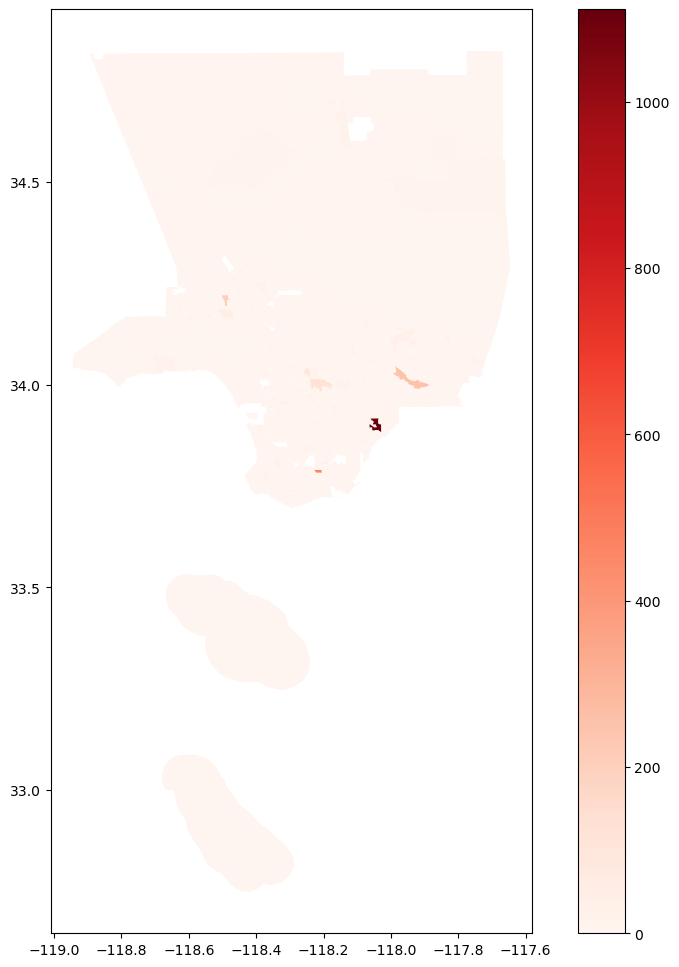

In [120]:
fig,ax = plt.subplots(figsize=(12,12))

tracts_snap.plot(ax=ax,column='snap_rate',legend=True,cmap='Reds')

This completes my work for the week. To recap, I made visualizations for the census data, merged the data with census tract shapefiles, created a map where only the top 10 census tracts (based on the proportion of zero vehicle households) were colorized, and explored the SNAP access data.